In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("cancer.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.shape

(569, 33)

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

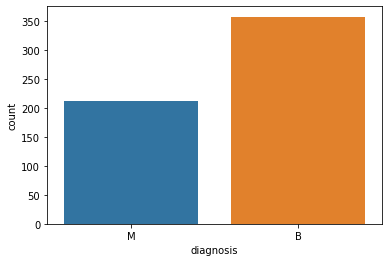

In [6]:
sns.countplot(df["diagnosis"])

In [7]:
df = df.drop(["id","Unnamed: 32"], axis = 1)

In [8]:
x = df.drop(["diagnosis"], axis = 1)
y = df["diagnosis"]

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 400)

In [12]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [13]:
y_pred

array(['M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'M', 'B'], dtype='<U1')

In [14]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[104   5]
 [  6  56]]
Accuracy: 0.935672514619883


In [16]:
results = metrics.classification_report(y_test, y_pred)
print(results)

              precision    recall  f1-score   support

           B       0.95      0.95      0.95       109
           M       0.92      0.90      0.91        62

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 6)

x_scaled_pca = pca.fit_transform(x_scaled)

In [37]:
print(pca.n_components_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

6
[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522]
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796]


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled_pca, y, test_size = 0.3, random_state = 400)

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[106   3]
 [  8  54]]
Accuracy: 0.935672514619883


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

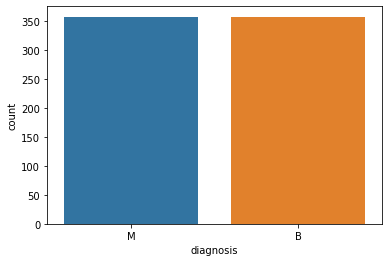

In [39]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()

x_bal, y_bal = sm.fit_resample(x_scaled, y)

sns.countplot(y_bal)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.3, random_state = 400)

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[102   7]
 [ 11  95]]
Accuracy: 0.9162790697674419


In [43]:
pca = PCA(n_components = 10)

x_scaled_pca = pca.fit_transform(x_bal)

print(pca.n_components_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

10
[0.46117353 0.1880807  0.09820396 0.06032607 0.04829778 0.0383814
 0.02261001 0.01423644 0.01272763 0.0106306 ]
[0.46117353 0.64925423 0.74745819 0.80778426 0.85608204 0.89446345
 0.91707346 0.9313099  0.94403754 0.95466813]


In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled_pca, y_bal, test_size = 0.3, random_state = 400)

model = GaussianNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[104   5]
 [  5 101]]
Accuracy: 0.9534883720930233


In [45]:
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 400)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[108   1]
 [  2  60]]
Accuracy: 0.9824561403508771


In [48]:
pca = PCA(n_components = 15)

x_scaled_pca = pca.fit_transform(x_scaled)

x_train, x_test, y_train, y_test = train_test_split(x_scaled_pca, y, test_size = 0.3, random_state = 400)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[108   1]
 [  2  60]]
Accuracy: 0.9824561403508771


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_bal, y_bal, test_size = 0.3, random_state = 400)

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

[[107   2]
 [  2 104]]
Accuracy: 0.9813953488372092
